# Rapidez de expasión del fondo marino

Corramos estas librarías que serán útiles para esta tarea:

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from cartopy import config
import cartopy.crs as ccrs

Ahora veremos la relación entre la edad del lecho marino (Ma) y la distancia desde la dorsal (km) para determinar la velocidad de propagación entre las placas oceánicas (km / Ma).  Un Ma (mega-annum) equivale a un millón de años. 

## Dorsal mesoatlántica
Los datos con los que trabajará para esta tarea provienen de las inversiones geomagnéticas y sus respectivas edades que exploramos en el jupyter notebook de la clase pasada.

In [2]:
# data from the Mid-Atlantic Ridge
atlantic_data=pd.read_csv('MAR_east_age_dist.csv')
atlantic_data.head()

,Unnamed: 0,Age,Lon,Lat,Distance
0,1,9.31,-44.90,24.16,153.99
1,4,9.31,-44.60,24.35,185.35
2,6,9.31,-44.43,24.46,190.08
3,10,9.31,-44.31,24.77,166.80
4,11,9.31,-44.29,24.87,152.27


Mostremos la ubicación de esas distintas edades en un mapa.

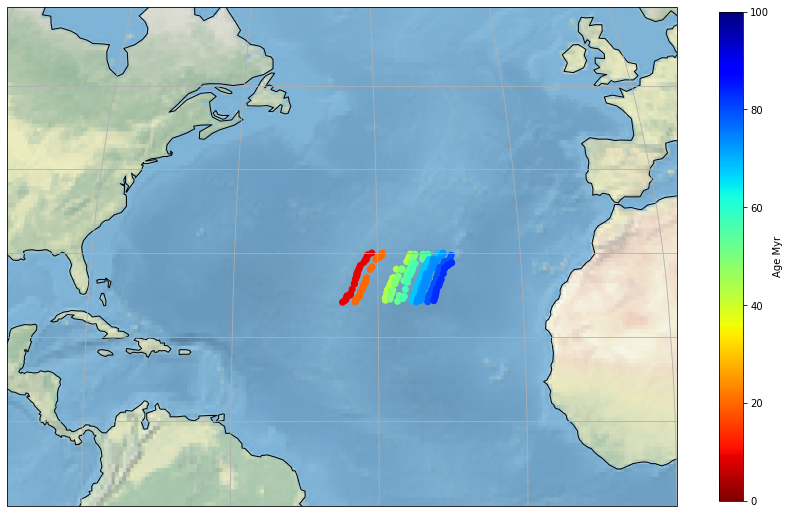

In [3]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.Robinson(-46.0))
ax.set_extent([-90.0, 0.0, 0.0, 60.0], crs=ccrs.PlateCarree())

plt.scatter(atlantic_data['Lon'],atlantic_data['Lat'],marker='o',c=atlantic_data['Age'],
            vmin=0,vmax=100,cmap='jet_r',transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,label='Age Myr')

ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

Plotee la distancia desde la dorsal en función de la edad del lecho marino. Incluya las etiquetas de los ejes y el título.

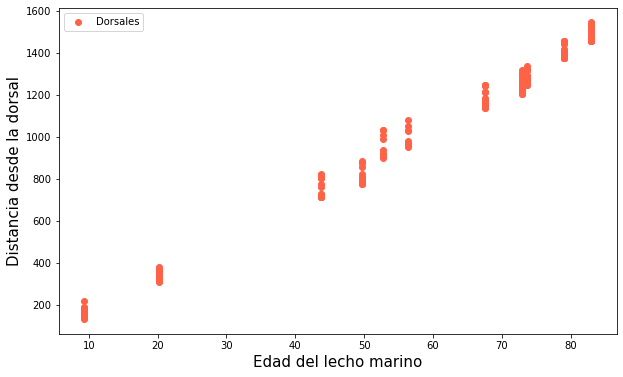

In [58]:
xa=atlantic_data['Age']
ya=atlantic_data['Distance']

plt.figure(1,(10,6))
plt.scatter(xa,ya,color='tomato',label='Dorsales')
plt.xlabel('Edad del lecho marino',fontsize=15)
plt.ylabel('Distancia desde la dorsal',fontsize=15)
plt.legend()

Ahora calculará la velocidad a la que se mueve la placa tectónica. Para ello debe encontrar la pendiente de una línea que atraviesa la gráfica de distancia desde la dorsal versus la edad del fondo marino. Para ajustar esta recta es necesario seleccionar dos puntos de los datos. Como probablemente ya saben, la ecuación  de una recta es $y = mx + b$ donde $ m $ es la pendiente y $ b $ es la intersección en y. La pendiente puede ser calculada como $ m  = \frac{y_ {1} -y_ {0}} {x_ {1} -x_ {0}} $ y luego con esa pendiente y resuelve para la intersección con en eje y como $b = y_ {1} -mx_ {1}$. Por ejemplo:

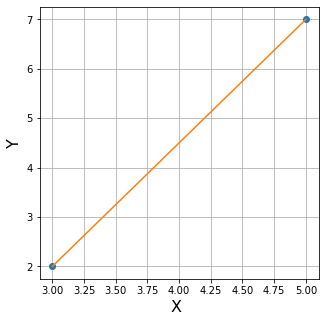

In [62]:
x = np.asarray([3.0, 5.0]);
y = np.asarray([2.0, 7.0]);

m = (y[1]-y[0])/(x[1]-x[0]);  # use the two points to find the slope rise/run, dy/dx
b = y[1]-m*x[1]  # solve for the y-intercept

plt.figure(1,(5,5)) 
plt.plot(x,y,'o')
plt.plot(x,m*x+b,'-')
plt.xlabel('X ', fontsize=16);
plt.ylabel('Y', fontsize=16);
plt.grid()

Defina una función que tome las coordenadas (x,y) de dos puntos de los datos y que devuelva la pendiente y la intersección con el eje y.

In [63]:
def mx_b(x0,y0,x1,y1):
    """
    Function to compute the slope and intercept of a line
    
    input parameters
    ----------
    x0,y0: first coordinate pair
    x1,y1: second coordinate pair
    output
    ------
    m : slope of line that connects (x0,y0) and (x1,y1)
    b : slope of line that connects (x0,y0) and (x1,y1)
    """
    
    #agrega tu codigo aqui
    m=(y1-y0)/(x1-x0)
    b=y1-m*x1

    return m,b

Usa tu función para aproximar una recta que atraviesa la gráfica de distancia versus edad para el Atlántico. Debe elegir dos coordenadas x, y que se encuentran dentro de los datos y calcular la línea que las conecta. Tiene libertad para escoger los puntos, intente seleccionar buen par de puntos que aproximen de mejor forma los datos.

In [68]:
x0=9.21
y0=153.99
x1=83
y1=1475
mx_b(x0,y0,x1,y1)

(17.902290283236212, -10.89009350860556)

Plotee esta recta sobre la gráfica distancia desde la dorsal atlántica vs edad.

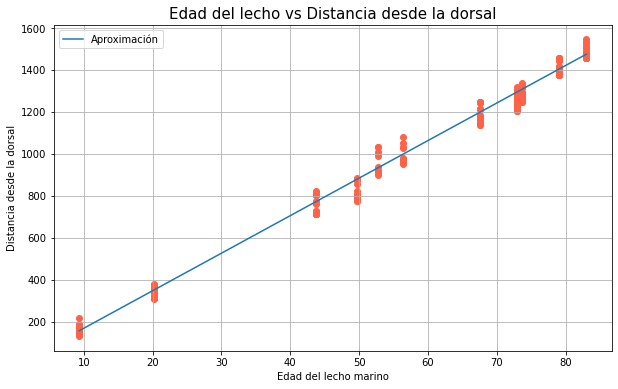

In [69]:
xa=atlantic_data['Age']
ya=atlantic_data['Distance']

plt.figure(1,(10,6))
plt.scatter(xa,ya,color='tomato')
plt.xlabel('Edad del lecho marino (Ma)',fontsize=10)
plt.ylabel('Distancia desde la dorsal (km)',fontsize=10)
plt.title('Edad del lecho vs Distancia desde la dorsal',size=15)

m,b=mx_b(x0,y0,x1,y1)
yb=atlantic_data['Age']*m+b

plt.plot(xa,yb,label='Aproximación')
plt.legend()
plt.grid()

¿Cuál es la velocidad de expansión de la dorsal del Atlántico?.

Aprox 17 km por cada Ma

## Dorsal del Pacífico Oriental
Hagamos el mismo proceso anterior pero ahora para la dorsal de Pacífico.

In [40]:
# data from the Pacific Antarctic Ridge
pacific_data=pd.read_csv('PAR_east_age_dist.csv')
pacific_data.head()

,Unnamed: 0,Age,Lon,Lat,Distance
0,3,0.78,-137.2106,-54.9759,57.5867
1,4,0.78,-137.1864,-54.9379,53.0835
2,5,0.78,-137.1575,-54.9122,57.7443
3,141,1.86,-136.5462,-55.1561,149.5914
4,142,1.86,-136.5178,-55.1163,148.0458


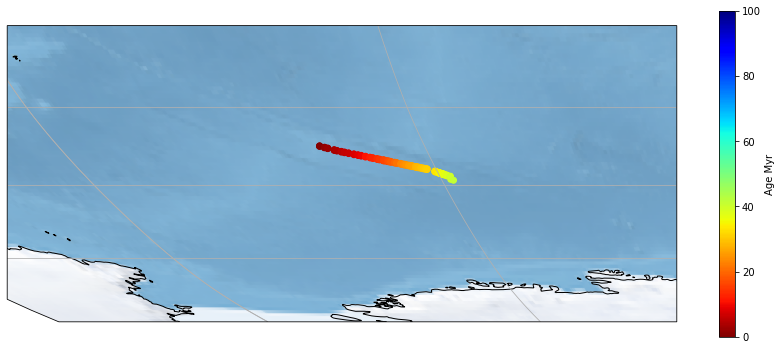

In [41]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.Robinson(-46.0))
ax.set_extent([-175.0, -90.0, -40.0, -80.0], crs=ccrs.PlateCarree())

plt.scatter(pacific_data['Lon'],pacific_data['Lat'],marker='o',c=pacific_data['Age'],
            vmin=0,vmax=100,cmap='jet_r',transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.4,label='Age Myr')

ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

Plotee la distancia desde la dorsal en función de la edad del lecho marino para la placa del Antartica. Incluya etiquetas en los ejes y el título.

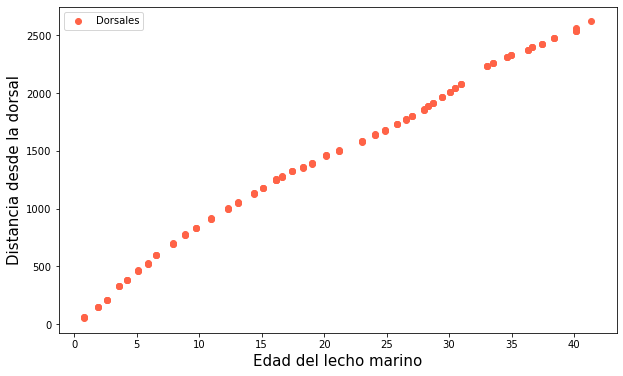

In [70]:
xa=pacific_data['Age']
ya=pacific_data['Distance']

plt.figure(1,(10,6))
plt.scatter(xa,ya,color='tomato',label='Dorsales')
plt.xlabel('Edad del lecho marino',fontsize=15)
plt.ylabel('Distancia desde la dorsal',fontsize=15)
plt.legend()

Usa tu función para aproximar una recta que atraviesa la gráfica de distancia vs. edad de la placa antártica.

Agregue esta recta a su gráfico de distancia vs. edad de la placa antártica.

In [73]:
x0=5.2
y0=460
x1=31
y1=2010
mx_b(x0,y0,x1,y1)

(60.07751937984496, 147.5968992248063)

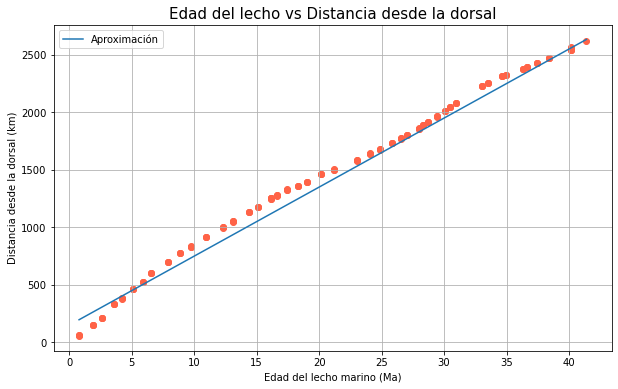

In [74]:
xa=pacific_data['Age']
ya=pacific_data['Distance']

plt.figure(1,(10,6))
plt.scatter(xa,ya,color='tomato')
plt.xlabel('Edad del lecho marino (Ma)',fontsize=10)
plt.ylabel('Distancia desde la dorsal (km)',fontsize=10)
plt.title('Edad del lecho vs Distancia desde la dorsal',size=15)

m,b=mx_b(x0,y0,x1,y1)
yb=pacific_data['Age']*m+b

plt.plot(xa,yb,label='Aproximación')
plt.legend()
plt.grid()

¿Cuál es la velocidad de propagación de la placa que se aleja de la dorsal Pacífico-Antártica?

Aprox 60 km por cada 1 Ma.

¿Es la pendiente de la placa antártica más o menos pronunciada que la del Atlántico oriental?. Haga una figura con ambos datos y sus respectivas aproximaciones lineales. ¿Qué dorsal se está extendiendo más rápido?

Es más pronunciada la del pacífico, basta con ver que éste es más rápido en su velocidad de propagación

Estas tasas de propagación que has calculado son lo que llamamos la mitad de la tasa de propagación. La tasa de propagación completa es la velocidad a la que viajan las dos placas oceánicas entre sí y es aproximadamente el doble de la tasa de propagación que se ha calculado durante esta tarea.

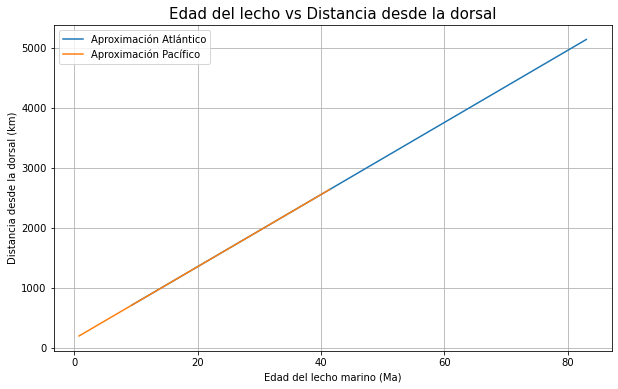

In [77]:
xa1=pacific_data['Age']
plt.figure(1,(10,6))
plt.xlabel('Edad del lecho marino (Ma)',fontsize=10)
plt.ylabel('Distancia desde la dorsal (km)',fontsize=10)
plt.title('Edad del lecho vs Distancia desde la dorsal',size=15)

yb1=pacific_data['Age']*m+b



xa2=atlantic_data['Age']

yb2=atlantic_data['Age']*m+b
plt.plot(xa2,yb2,label='Aproximación Atlántico')

plt.plot(xa1,yb1,label='Aproximación Pacífico')
plt.legend()
plt.grid()
